# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import h5py

In [14]:
filename = "training_3digits.hdf5"
train = h5py.File('/content/drive/MyDrive/training_3digits.hdf5','r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [15]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File('/content/drive/MyDrive/testing_3digits_part1.hdf5','r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [16]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File('/content/drive/MyDrive/testing_3digits_part2.hdf5','r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [19]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


filename_train = "training_3digits.hdf5"
train = h5py.File('/content/drive/MyDrive/training_3digits.hdf5', 'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()


train_images_flat = train_images.reshape((train_images.shape[0], -1)) / 255.0


X_train, X_val, y_train, y_val = train_test_split(
    train_images_flat, train_digits, test_size=0.2, random_state=42
)


mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


mlp.fit(X_train, y_train)


val_predictions = mlp.predict(X_val)


accuracy_val = accuracy_score(y_val, val_predictions)
print(f'Accuracy on the validation set: {accuracy_val}')


filename_test1 = "testing_3digits_part1.hdf5"
test1 = h5py.File('/content/drive/MyDrive/testing_3digits_part1.hdf5', 'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()


test_images_flat_1 = test_images_1.reshape((test_images_1.shape[0], -1)) / 255.0


test_predictions_1 = mlp.predict(test_images_flat_1)


accuracy_test_1 = accuracy_score(test_digits_1, test_predictions_1)
print(f'Accuracy on test set part 1: {accuracy_test_1}')


filename_test2 = "testing_3digits_part2.hdf5"
test2 = h5py.File('/content/drive/MyDrive/testing_3digits_part2.hdf5', 'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()


test_images_flat_2 = test_images_2.reshape((test_images_2.shape[0], -1)) / 255.0


test_predictions_2 = mlp.predict(test_images_flat_2)


accuracy_test_2 = accuracy_score(test_digits_2, test_predictions_2)
print(f'Accuracy on test set part 2: {accuracy_test_2}')


Accuracy on the validation set: 1.0
Accuracy on test set part 1: 1.0
Accuracy on test set part 2: 0.0


**OBSERVATIONS**

1. In this we can observe that we are getting the **accuracy of 100%** for the test set part1 which indicates that the images of the training data set is the same or of similar kind which are present in test set part1 .

2. For the test set part2 we are getting the **accuracy 0%** which depicts that the dataset of the images are different from the dataset which we have trained in the training dataset.This can be interpreted as there could be a significant difference between the distribution of data in the training sets and test set part and  could include variations in image quality, background, or other factors not present in the training set.

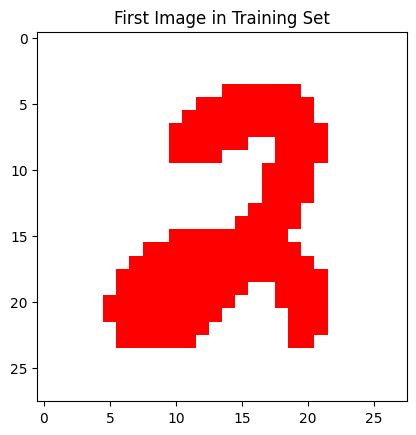

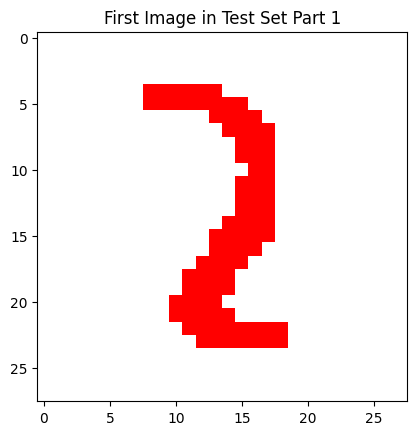

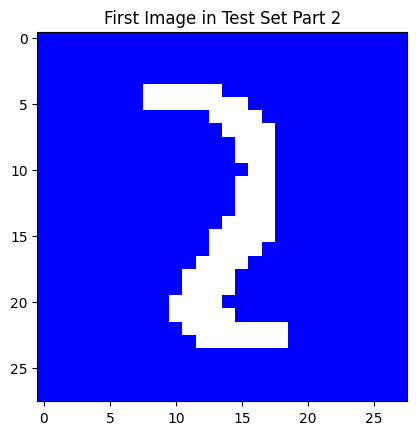

In [20]:
import matplotlib.pyplot as plt


plt.imshow(train_images[0], cmap='gray')
plt.title('First Image in Training Set')
plt.show()


plt.imshow(test_images_1[0], cmap='gray')
plt.title('First Image in Test Set Part 1')
plt.show()


plt.imshow(test_images_2[0], cmap='gray')
plt.title('First Image in Test Set Part 2')
plt.show()


Thus we can see from printing the first images of all the datasets that images in the training and test set part1 is similar to each other while the image for test part2 is different.